<a href="https://colab.research.google.com/github/Tech-Ajay/ML-Assignments/blob/main/Etivity1_3_Probability_23208341.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Details

Student Name: **Ajay Neelankatil**

*Student* ID: **23208341**

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [6]:
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

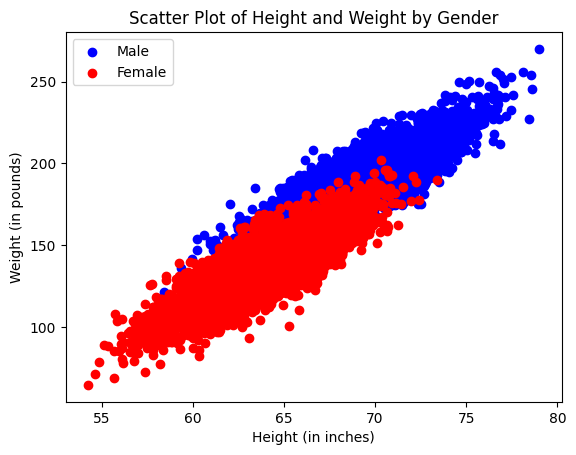

In [7]:
################################
import matplotlib.pyplot as plt

# Plot male data points in blue
plt.scatter(data[data['Gender'] == 'Male']['Height'], data[data['Gender'] == 'Male']['Weight'], c='blue', label='Male')

# Plot female data points in red
plt.scatter(data[data['Gender'] == 'Female']['Height'], data[data['Gender'] == 'Female']['Weight'], c='red', label='Female')

plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.legend()
plt.title('Scatter Plot of Height and Weight by Gender')
plt.show()


###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [8]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (33% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Now, you have X_train and y_train for training and X_test and y_test for testing

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [10]:
from sklearn.naive_bayes import GaussianNB

# Creating a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model using your training data (X_train and y_train)
model.fit(X_train, y_train)

GaussianNB()

### Test the algorithm
Using the test data

In [14]:
from sklearn.metrics import accuracy_score

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Accuracy on Test Data: 88.64%


### Plot the random samples

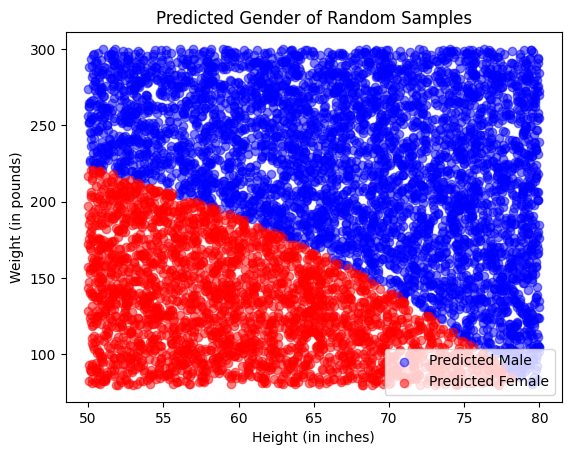

In [18]:
import matplotlib.pyplot as plt

# Generate random samples for prediction
num_samples = 7000
random_heights = np.random.uniform(50, 80, num_samples)  # Adjust range as needed
random_weights = np.random.uniform(80, 300, num_samples)  # Adjust range as needed
random_samples = pandas.DataFrame({'Height': random_heights, 'Weight': random_weights})

# Use the trained model to predict the genders of the random samples
random_predictions = model.predict(random_samples)

# Create a scatter plot to visualize the predicted genders
# Plot male data points in blue and female data points in red
plt.scatter(random_samples[random_predictions == 'Male']['Height'], random_samples[random_predictions == 'Male']['Weight'], c='blue', label='Predicted Male', alpha=0.5)
plt.scatter(random_samples[random_predictions == 'Female']['Height'], random_samples[random_predictions == 'Female']['Weight'], c='red', label='Predicted Female', alpha=0.5)
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.legend()
plt.title('Predicted Gender of Random Samples')
plt.show()
